# Cluster analysis on customers going to the mall

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from sklearn.cluster import KMeans

import os

print("Modules Imported.")

Modules Imported.


In [2]:
data = pd.read_csv(os.getcwd() + '/data/Mall_Customers.csv')

In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Taking a look at the data and relationships

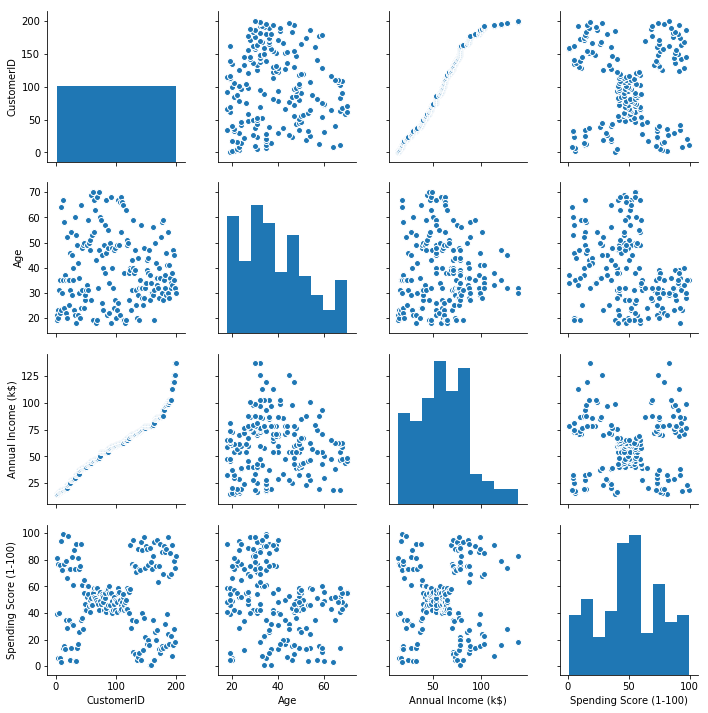

In [5]:
sns.pairplot(data)

#### Some observations:

CustomerID is ordered by Annual Income.  

Not much correlation between age and income.

The upper right quadrant of 'Age' and 'Spending Score' is missing... older individuals don't spend much?

Some interesting clustering when plotting 'Spending score' vs 'Annual Income', so lets look into that

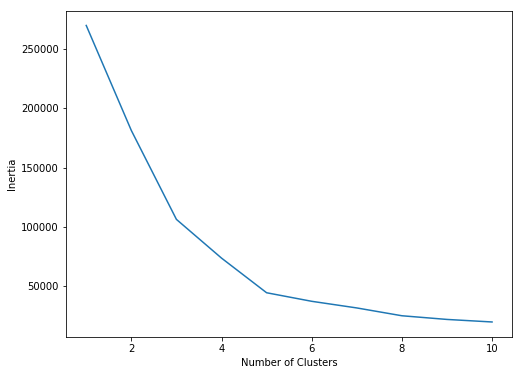

In [6]:
data_income_ss = data[['Annual Income (k$)','Spending Score (1-100)']]
inertia = [] #Squared distance between centroids and data points
for n in range(1,11): # Number of clusters to test
    clustering_model = KMeans(
        n_clusters = n,
        init='random', #random placement of clusters
        max_iter=300,
        )
    clustering_model.fit(data_income_ss)
    inertia.append(clustering_model.inertia_)
    
plt.figure(figsize=(8,6))    
plt.plot(np.arange(1,len(inertia)+1), inertia)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.show()

##### Want to select 5 clusters based on the "Elbow".  This is what we would expect when looking at the plots above

In [7]:
five_cluster_model = KMeans(
    n_clusters = 5,
    init='random')

y_kmeans = five_cluster_model.fit_predict(data_income_ss)

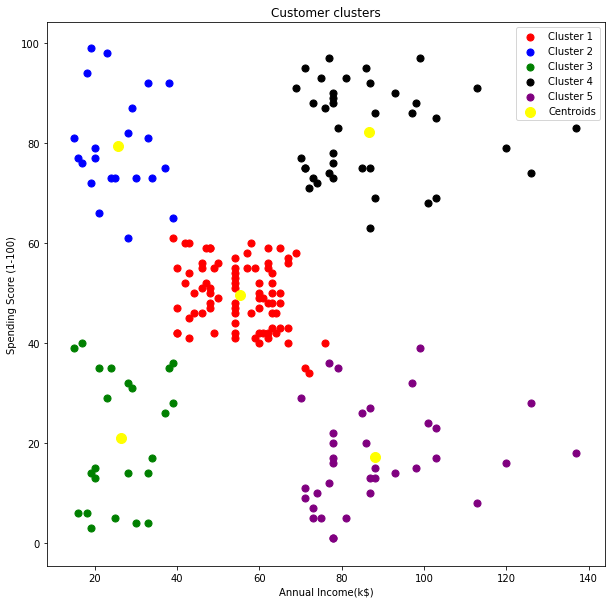

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(data_income_ss.values[y_kmeans == 0,0],
            data_income_ss.values[y_kmeans == 0,1],
            c='red',
            s=50,
            label='Cluster 1')
plt.scatter(data_income_ss.values[y_kmeans == 1,0],
            data_income_ss.values[y_kmeans == 1,1],
            c='blue',
            s=50,
            label='Cluster 2')
plt.scatter(data_income_ss.values[y_kmeans == 2,0],
            data_income_ss.values[y_kmeans == 2,1],
            c='green',
            s=50,
            label='Cluster 3')
plt.scatter(data_income_ss.values[y_kmeans == 3,0],
            data_income_ss.values[y_kmeans == 3,1],
            c='black',
            s=50,
            label='Cluster 4')
plt.scatter(data_income_ss.values[y_kmeans == 4,0],
            data_income_ss.values[y_kmeans == 4,1],
            c='purple',
            s=50,
            label='Cluster 5')
plt.scatter(five_cluster_model.cluster_centers_[:,0], 
            five_cluster_model.cluster_centers_[:,1],
            s=100,
            c='yellow',
            label='Centroids')

plt.title('Customer clusters')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Some Interpretation:
Each of these clusters should correspond to a specific type of mall customer:

High income customers are split into two groups: high and low spending
Same with Low income customers
High or low income customers do not spend moderately
Interestingly, Middle income customers appear to only spend moderately

This clustering could easily be seen in the inital plots, but the groups are now quantitatively separated by the KMeans clustering algorithm


## If we add age to the clustering algorithm, are there any new insights?

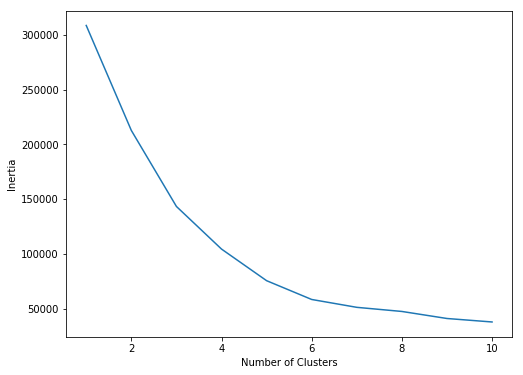

In [9]:
data_income_ss_age = data[['Annual Income (k$)','Spending Score (1-100)','Age']]
inertia = [] #Squared distance between centroids and data points
for n in range(1,11): # Number of clusters to test
    clustering_model = KMeans(
        n_clusters = n,
        init='random', #random placement of clusters
        max_iter=300,
        )
    clustering_model.fit(data_income_ss_age)
    inertia.append(clustering_model.inertia_)
    
plt.figure(figsize=(8,6))    
plt.plot(np.arange(1,len(inertia)+1), inertia)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.show()

##### Looks like there might be an elbow at 6 clusters?  Let's look if we can see it visually

In [10]:
six_cluster_model = KMeans(
    n_clusters = 6,
    init='random')

y_kmeans = six_cluster_model.fit_predict(data_income_ss_age)

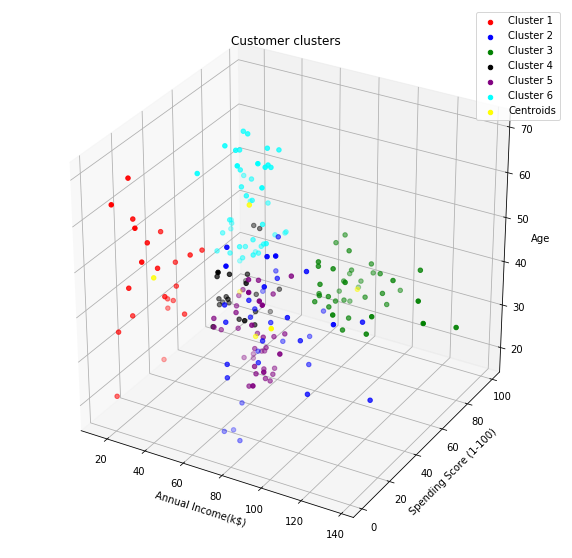

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_income_ss_age.values[y_kmeans == 0,0],
            data_income_ss_age.values[y_kmeans == 0,1],
            data_income_ss_age.values[y_kmeans == 0,2],
            c='red',
            label='Cluster 1')
ax.scatter(data_income_ss_age.values[y_kmeans == 1,0],
            data_income_ss_age.values[y_kmeans == 1,1],
            data_income_ss_age.values[y_kmeans == 1,2],
            c='blue',
            label='Cluster 2')
ax.scatter(data_income_ss_age.values[y_kmeans == 2,0],
            data_income_ss_age.values[y_kmeans == 2,1],
            data_income_ss_age.values[y_kmeans == 2,2],
            c='green',
            label='Cluster 3')
ax.scatter(data_income_ss_age.values[y_kmeans == 3,0],
            data_income_ss_age.values[y_kmeans == 3,1],
            data_income_ss_age.values[y_kmeans == 3,2],
            c='black',
            label='Cluster 4')
ax.scatter(data_income_ss_age.values[y_kmeans == 4,0],
            data_income_ss_age.values[y_kmeans == 4,1],
            data_income_ss_age.values[y_kmeans == 4,2],
            c='purple',
            label='Cluster 5')
ax.scatter(data_income_ss_age.values[y_kmeans == 5,0],
            data_income_ss_age.values[y_kmeans == 5,1],
            data_income_ss_age.values[y_kmeans == 5,2],
            c='cyan',
            label='Cluster 6')

ax.scatter(six_cluster_model.cluster_centers_[:,0], 
            six_cluster_model.cluster_centers_[:,1],
            six_cluster_model.cluster_centers_[:,2],
            c='yellow',
            label='Centroids')

ax.set_title('Customer clusters')
ax.set_xlabel('Annual Income(k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()
plt.show()

##### Age does not appear to separate any additional useful clustering